In [181]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import shape
import contextily as ctx 
import folium

In [218]:
url_collison  = f'/Users/tsernian/Documents/CASA/CASA0007_Quantitative Methods/CASA0007_Quantitative-Methods/Assessment/group work/data/dft-road-casualty-statistics-collision-2023.csv'
url_vehicle = f'/Users/tsernian/Documents/CASA/CASA0007_Quantitative Methods/CASA0007_Quantitative-Methods/Assessment/group work/data/dft-road-casualty-statistics-vehicle-2023.csv'
url_MSOA = f'/Users/tsernian/Documents/CASA/CASA0007_Quantitative Methods/CASA0007_Quantitative-Methods/Assessment/group work/data/MSOA/MSOA_2011_London_gen_MHW.shp'
url_cycle_lane = f'/Users/tsernian/Documents/CASA/CASA0007_Quantitative Methods/CASA0007_Quantitative-Methods/Assessment/group work/data/cycle_lane_track.json'


In [219]:
df_collison = pd.read_csv(url_collison)
df_vehicle = pd.read_csv(url_vehicle)
msoa_london = gpd.read_file(url_MSOA)
cycle_lane = pd.read_json(url_cycle_lane)

print(f"Data frame collison is {df_collison.shape[0]:,} x {df_collison.shape[1]}")
print(f"Data frame vehicle is {df_vehicle.shape[0]:,} x {df_vehicle.shape[1]}")
print(f"Data frame msoa_london is {msoa_london.shape[0]:,} x {msoa_london.shape[1]}")
print(f"Data frame cycle_lane is {cycle_lane.shape[0]:,} x {cycle_lane.shape[1]}")
#Data frame collison is 104,258 x 37, Data frame vehicle is 189,815 x 34 It mean df_collision is unique for each accident_index

/var/folders/2h/1m7z0d1n4vj7fd1rd7zpjsbm0000gn/T/ipykernel_78240/4050822527.py:1: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_collison = pd.read_csv(url_collison)
/var/folders/2h/1m7z0d1n4vj7fd1rd7zpjsbm0000gn/T/ipykernel_78240/4050822527.py:2: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_vehicle = pd.read_csv(url_vehicle)


Data frame collison is 104,258 x 37
Data frame vehicle is 189,815 x 34
Data frame msoa_london is 983 x 13
Data frame cycle_lane is 24,976 x 3


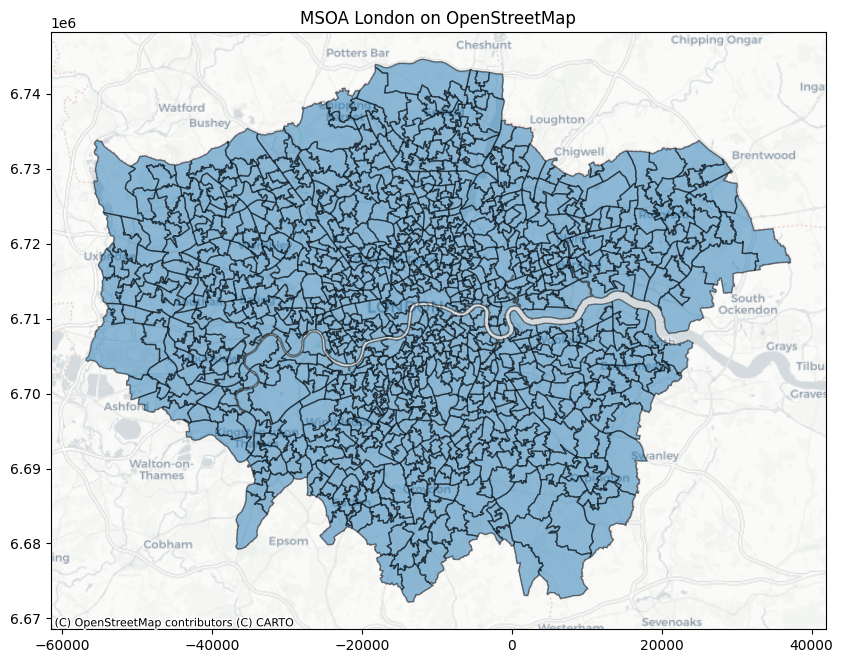

In [152]:
msoa_london = msoa_london.to_crs(epsg=3857)
fig, ax = plt.subplots(figsize=(10, 10))
msoa_london.plot(ax=ax, alpha=0.5, edgecolor='k')

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.title('MSOA London on OpenStreetMap')
plt.show()

In [153]:
df_collison.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,enhanced_severity_collision
0,2023010419171,2023,10419171,525060.0,170416.0,-0.202878,51.418974,1,3,1,...,4,8,2,0,0,1,1,2,E01003383,-1
1,2023010419183,2023,10419183,535463.0,198745.0,-0.042464,51.671155,1,3,3,...,4,1,1,0,0,1,1,2,E01001547,-1
2,2023010419189,2023,10419189,508702.0,177696.0,-0.435789,51.487777,1,3,2,...,4,1,1,0,0,1,1,2,E01002448,-1
3,2023010419191,2023,10419191,520341.0,190175.0,-0.263972,51.597575,1,3,2,...,4,9,1,0,0,1,1,2,E01000129,-1
4,2023010419192,2023,10419192,527255.0,176963.0,-0.168976,51.477324,1,3,2,...,4,1,1,0,0,1,1,2,E01004583,-1


In [154]:
df_vehicle.head()

,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,...,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver,escooter_flag,dir_from_e,dir_from_n,dir_to_e,dir_to_n,driver_distance_banding
0,2023010419171,2023,10419171,1,11,0,4,1,5,0,...,ALEXANDER DENNIS MODEL MISSING,3,1,E01001177,0,NaN,NaN,NaN,NaN,2
1,2023010419183,2023,10419183,1,11,0,18,5,1,0,...,WRIGHTBUS GEMINI,6,1,E01001419,0,NaN,NaN,NaN,NaN,2
2,2023010419183,2023,10419183,2,9,0,9,1,6,0,...,TOYOTA YARIS,3,1,E01001546,0,NaN,NaN,NaN,NaN,1
3,2023010419183,2023,10419183,3,9,0,8,7,1,0,...,BMW 2 SERIES,4,1,E01001686,0,NaN,NaN,NaN,NaN,4
4,2023010419189,2023,10419189,1,9,0,18,7,3,0,...,LEXUS RX 400,5,1,E01002443,0,NaN,NaN,NaN,NaN,1


In [155]:
# Filter the data frame to only include bike
df_bike = df_vehicle[df_vehicle['vehicle_type'] == 1]
df_bike.head()
print (df_bike['accident_index'].nunique())
print (df_bike['accident_index'].value_counts())



15405
accident_index
2023041365693    5
2023991328668    5
2023440336740    4
2023010438671    3
2023010457642    3
                ..
2023041354897    1
2023041354922    1
2023041354994    1
2023041355130    1
2023991430845    1
Name: count, Length: 15405, dtype: int64


In [156]:
selected_rows = df_collison[df_collison['accident_index'] == 2023010419183]
selected_rows

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,enhanced_severity_collision
1,2023010419183,2023,10419183,535463.0,198745.0,-0.042464,51.671155,1,3,3,...,4,1,1,0,0,1,1,2,E01001547,-1


In [157]:
df_collison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104258 entries, 0 to 104257
Data columns (total 37 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               104258 non-null  object 
 1   accident_year                                104258 non-null  int64  
 2   accident_reference                           104258 non-null  object 
 3   location_easting_osgr                        104246 non-null  float64
 4   location_northing_osgr                       104246 non-null  float64
 5   longitude                                    104246 non-null  float64
 6   latitude                                     104246 non-null  float64
 7   police_force                                 104258 non-null  int64  
 8   accident_severity                            104258 non-null  int64  
 9   number_of_vehicles                           104258 non-nul

In [158]:
columns_to_use = ['accident_index', 'accident_year', 'accident_severity', 'number_of_vehicles', 'number_of_casualties','junction_control',
                  'junction_detail','pedestrian_crossing_physical_facilities','light_conditions','weather_conditions','road_surface_conditions', 'carriageway_hazards',
                  'road_type','date', 'time','day_of_week', 'longitude', 'latitude']    #'vehicle_type','sex_of_driver','age_band_of_driver',
df_collison_2023 = df_collison[columns_to_use]
df_collison_2023.head(10)

,accident_index,accident_year,accident_severity,number_of_vehicles,number_of_casualties,junction_control,junction_detail,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,carriageway_hazards,road_type,date,time,day_of_week,longitude,latitude
0,2023010419171,2023,3,1,1,4,9,5,4,8,2,0,2,01/01/2023,01:24,1,-0.202878,51.418974
1,2023010419183,2023,3,3,2,4,3,1,4,1,1,0,6,01/01/2023,02:25,1,-0.042464,51.671155
2,2023010419189,2023,3,2,1,4,1,0,4,1,1,0,1,01/01/2023,03:50,1,-0.435789,51.487777
3,2023010419191,2023,3,2,1,4,3,0,4,9,1,0,6,01/01/2023,02:13,1,-0.263972,51.597575
4,2023010419192,2023,3,2,1,4,8,0,4,1,1,0,6,01/01/2023,01:42,1,-0.168976,51.477324
5,2023010419198,2023,3,1,1,-1,0,5,4,1,1,0,6,01/01/2023,02:10,1,-0.201941,51.545349
6,2023010419201,2023,3,2,1,2,6,0,4,1,2,0,6,01/01/2023,03:00,1,-0.097014,51.499145
7,2023010419205,2023,3,1,1,-1,0,0,1,1,1,0,3,01/01/2023,07:25,1,0.072337,51.526805
8,2023010419209,2023,3,1,1,-1,0,4,4,1,1,0,6,01/01/2023,07:23,1,-0.072322,51.583379
9,2023010419223,2023,3,2,1,4,3,4,1,1,1,0,6,01/01/2023,11:35,1,-0.382585,51.479143


## the data is include the accident data overaround the UK

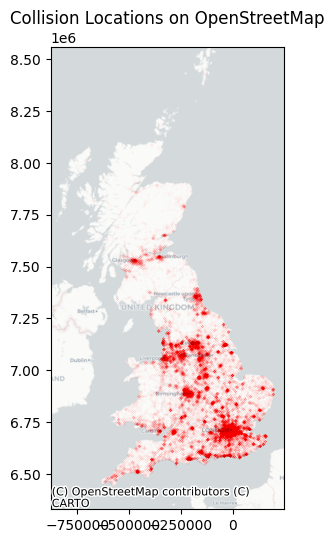

In [159]:
geometry = [Point(xy) for xy in zip(df_collison_2023['longitude'], df_collison_2023['latitude'])]
gdf = gpd.GeoDataFrame(df_collison_2023, geometry=geometry, crs="EPSG:4326")

gdf = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 6))
gdf.plot(ax=ax, color='red', markersize=0.01, alpha=0.1)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.title('Collision Locations on OpenStreetMap')
plt.show()

### Spatial Join Collision data and London MSOA

In [160]:
# create a GeoDataFrame for df_collison_2023
geometry = [Point(xy) for xy in zip(df_collison_2023['longitude'], df_collison_2023['latitude'])]
gdf_collison = gpd.GeoDataFrame(df_collison_2023, geometry=geometry, crs="EPSG:4326")

# change to the same CRS
gdf_collison = gdf_collison.to_crs(epsg=3857)
msoa_london = msoa_london.to_crs(epsg=3857)

# spatial join
collisions_in_msoa = gpd.sjoin(gdf_collison, msoa_london, how="inner", predicate='intersects')

# keep the columns of gdf_collison and choose the columns of msoa_london I want to keep
columns_to_keep = gdf_collison.columns.tolist() + ['MSOA11CD', 'LAD11CD', 'LAD11NM']
collisions_in_msoa = collisions_in_msoa[columns_to_keep]

print(collisions_in_msoa.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 22884 entries, 0 to 87867
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   accident_index                           22884 non-null  object  
 1   accident_year                            22884 non-null  int64   
 2   accident_severity                        22884 non-null  int64   
 3   number_of_vehicles                       22884 non-null  int64   
 4   number_of_casualties                     22884 non-null  int64   
 5   junction_control                         22884 non-null  int64   
 6   junction_detail                          22884 non-null  int64   
 7   pedestrian_crossing_physical_facilities  22884 non-null  int64   
 8   light_conditions                         22884 non-null  int64   
 9   weather_conditions                       22884 non-null  int64   
 10  road_surface_conditions        

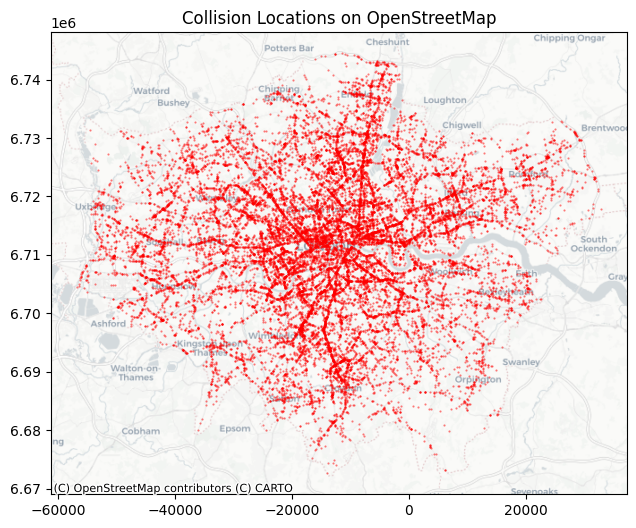

In [161]:
geometry_map = [Point(xy) for xy in zip(collisions_in_msoa['longitude'], collisions_in_msoa['latitude'])]  # create a geometry column
gdf_all = gpd.GeoDataFrame(collisions_in_msoa, geometry=geometry_map, crs="EPSG:4326")

gdf_all = gdf_all.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 6))
gdf_all.plot(ax=ax, color='red', markersize=0.3, alpha=0.5)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
plt.title('Collision Locations on OpenStreetMap')
plt.show()

In [162]:
gdf

,accident_index,accident_year,accident_severity,number_of_vehicles,number_of_casualties,junction_control,junction_detail,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,carriageway_hazards,road_type,date,time,day_of_week,longitude,latitude,geometry
0,2023010419171,2023,3,1,1,4,9,5,4,8,2,0,2,01/01/2023,01:24,1,-0.202878,51.418974,POINT (-22584.276 6695742.688)
1,2023010419183,2023,3,3,2,4,3,1,4,1,1,0,6,01/01/2023,02:25,1,-0.042464,51.671155,POINT (-4727.071 6740883.072)
2,2023010419189,2023,3,2,1,4,1,0,4,1,1,0,1,01/01/2023,03:50,1,-0.435789,51.487777,POINT (-48511.81 6708033.631)
3,2023010419191,2023,3,2,1,4,3,0,4,9,1,0,6,01/01/2023,02:13,1,-0.263972,51.597575,POINT (-29385.229 6727686.381)
4,2023010419192,2023,3,2,1,4,8,0,4,1,1,0,6,01/01/2023,01:42,1,-0.168976,51.477324,POINT (-18810.322 6706165.117)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104253,2023991452286,2023,2,1,1,-1,0,-1,5,2,2,-1,6,07/12/2023,08:43,5,-4.447490,55.819059,POINT (-495092.322 7522479.421)
104254,2023991452640,2023,3,2,1,4,9,0,1,9,1,0,6,06/10/2023,10:10,6,-4.752200,55.097920,POINT (-529012.484 7380893.628)
104255,2023991453360,2023,3,2,1,-1,0,-1,4,2,2,-1,6,15/11/2023,17:00,4,-2.276957,57.148422,POINT (-253469.694 7790515.541)
104256,2023991461915,2023,3,1,1,4,9,-1,4,8,1,-1,6,07/02/2023,21:40,3,-4.047591,55.775637,POINT (-450575.769 7513880.366)


In [163]:
df_bike_join_collison = pd.merge(df_bike, df_collison_2023, on='accident_index', how='left')
print(f"Data frame bike_join_collison is {df_bike_join_collison.shape[0]:,} x {df_bike_join_collison.shape[1]}")

Data frame bike_join_collison is 15,667 x 51


In [164]:
df_bike_join_collison.head(1)

,accident_index,accident_year_x,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,...,light_conditions,weather_conditions,road_surface_conditions,carriageway_hazards,road_type,date,time,day_of_week,longitude,latitude
0,2023010419191,2023,10419191,2,1,0,18,8,4,0,...,4.0,9.0,1.0,0.0,6.0,01/01/2023,02:13,1.0,-0.263972,51.597575


In [167]:
# create a GeoDataFrame for df_collison_2023
geometry_bike = [Point(xy) for xy in zip(df_bike_join_collison['longitude'], df_bike_join_collison['latitude'])]
gdf_bike = gpd.GeoDataFrame(df_bike_join_collison, geometry=geometry_bike, crs="EPSG:4326")

# change to the same CRS
gdf_bike = gdf_bike.to_crs(epsg=3857)
msoa_london = msoa_london.to_crs(epsg=3857)

# spatial join
collisions_in_msoa_bike = gpd.sjoin(gdf_bike, msoa_london, how="inner", predicate='intersects')

# keep the columns of gdf_collison and choose the columns of msoa_london I want to keep
columns_to_keep = gdf_bike.columns.tolist() + ['MSOA11CD', 'LAD11CD', 'LAD11NM']
collisions_in_msoa_bike = collisions_in_msoa_bike[columns_to_keep]

# 查看結果
print(collisions_in_msoa_bike.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 5026 entries, 0 to 11252
Data columns (total 55 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   accident_index                           5026 non-null   object  
 1   accident_year_x                          5026 non-null   int64   
 2   accident_reference                       5026 non-null   object  
 3   vehicle_reference                        5026 non-null   int64   
 4   vehicle_type                             5026 non-null   int64   
 5   towing_and_articulation                  5026 non-null   int64   
 6   vehicle_manoeuvre                        5026 non-null   int64   
 7   vehicle_direction_from                   5026 non-null   int64   
 8   vehicle_direction_to                     5026 non-null   int64   
 9   vehicle_location_restricted_lane         5026 non-null   int64   
 10  junction_location               

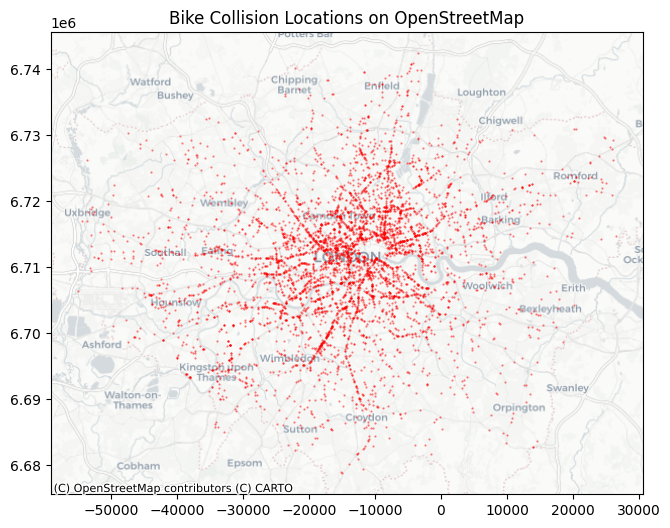

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 5026 entries, 0 to 11252
Data columns (total 55 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   accident_index                           5026 non-null   object  
 1   accident_year_x                          5026 non-null   int64   
 2   accident_reference                       5026 non-null   object  
 3   vehicle_reference                        5026 non-null   int64   
 4   vehicle_type                             5026 non-null   int64   
 5   towing_and_articulation                  5026 non-null   int64   
 6   vehicle_manoeuvre                        5026 non-null   int64   
 7   vehicle_direction_from                   5026 non-null   int64   
 8   vehicle_direction_to                     5026 non-null   int64   
 9   vehicle_location_restricted_lane         5026 non-null   int64   
 10  junction_location               

In [191]:
geometry_bike_map = [Point(xy) for xy in zip(collisions_in_msoa_bike['longitude'], collisions_in_msoa_bike['latitude'])] 
gdf_bike_map = gpd.GeoDataFrame(collisions_in_msoa_bike, geometry=geometry_bike_map, crs="EPSG:4326")

gdf_bike_map = gdf_bike_map.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 6))
gdf_bike_map.plot(ax=ax, color='red', markersize=0.3, alpha=0.5)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
plt.title('Bike Collision Locations on OpenStreetMap')
plt.show()

gdf_bike_map.info()

In [204]:
columns_to_use_bike = ['accident_index','weather_conditions','road_type','vehicle_type', 'sex_of_driver', 'age_band_of_driver'
                       ,'date', 'time','day_of_week', 'longitude', 'latitude', 'geometry','MSOA11CD', 'LAD11CD', 'LAD11NM']
gdf_bike_analysis = gdf_bike_map[columns_to_use_bike]

gdf_bike_analysis.info()
print(f"Data frame bike_analysis is {gdf_bike_analysis.shape[0]:,} x {gdf_bike_analysis.shape[1]}")



<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 5026 entries, 0 to 11252
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   accident_index      5026 non-null   object  
 1   weather_conditions  5026 non-null   float64 
 2   road_type           5026 non-null   float64 
 3   vehicle_type        5026 non-null   int64   
 4   sex_of_driver       5026 non-null   int64   
 5   age_band_of_driver  5026 non-null   int64   
 6   date                5026 non-null   object  
 7   time                5026 non-null   object  
 8   day_of_week         5026 non-null   float64 
 9   longitude           5026 non-null   float64 
 10  latitude            5026 non-null   float64 
 11  geometry            5026 non-null   geometry
 12  MSOA11CD            5026 non-null   object  
 13  LAD11CD             5026 non-null   object  
 14  LAD11NM             5026 non-null   object  
dtypes: float64(5), geometry(1), int64(

In [235]:
print(gdf_bike_analysis.head(5))
gdf_bike_analysis.to_csv('/Users/tsernian/Documents/CASA/CASA0007_Quantitative Methods/CASA0007_Quantitative-Methods/Assessment/group work/data/bike_analysis.csv', index=False)


  accident_index  weather_conditions  road_type  vehicle_type  sex_of_driver  \
0  2023010419191                 9.0        6.0             1              1   
1  2023010419201                 1.0        6.0             1              1   
2  2023010419297                 1.0        2.0             1              1   
3  2023010419324                 1.0        6.0             1              1   
4  2023010419335                 1.0        6.0             1              1   

   age_band_of_driver        date   time  day_of_week  longitude   latitude  \
0                   6  01/01/2023  02:13          1.0  -0.263972  51.597575   
1                   5  01/01/2023  03:00          1.0  -0.097014  51.499145   
2                   6  01/01/2023  23:39          1.0   0.032626  51.542508   
3                   6  02/01/2023  13:00          2.0  -0.167511  51.529655   
4                   8  02/01/2023  14:30          2.0  -0.210802  51.518723   

                         geometry   MSOA11CD

In [197]:
cycle_lane.head(10)

,type,name,features
0,FeatureCollection,cycle_lane_track,"{'type': 'Feature', 'geometry': {'type': 'Line..."
1,FeatureCollection,cycle_lane_track,"{'type': 'Feature', 'geometry': {'type': 'Line..."
2,FeatureCollection,cycle_lane_track,"{'type': 'Feature', 'geometry': {'type': 'Line..."
3,FeatureCollection,cycle_lane_track,"{'type': 'Feature', 'geometry': {'type': 'Line..."
4,FeatureCollection,cycle_lane_track,"{'type': 'Feature', 'geometry': {'type': 'Line..."
5,FeatureCollection,cycle_lane_track,"{'type': 'Feature', 'geometry': {'type': 'Line..."
6,FeatureCollection,cycle_lane_track,"{'type': 'Feature', 'geometry': {'type': 'Line..."
7,FeatureCollection,cycle_lane_track,"{'type': 'Feature', 'geometry': {'type': 'Line..."
8,FeatureCollection,cycle_lane_track,"{'type': 'Feature', 'geometry': {'type': 'Line..."
9,FeatureCollection,cycle_lane_track,"{'type': 'Feature', 'geometry': {'type': 'Line..."


In [185]:
features = cycle_lane['features']
geometries = [shape(feature['geometry']) for feature in features]
gdf_cycle_lane = gpd.GeoDataFrame(geometry=geometries, crs="EPSG:4326")


map_cycle_lane = folium.Map(location=[51.5074, -0.1278], zoom_start=12)  


for _, row in gdf_cycle_lane.iterrows():
    folium.GeoJson(row['geometry']).add_to(map_cycle_lane)

map_cycle_lane.save('cycle_lane_map.html')


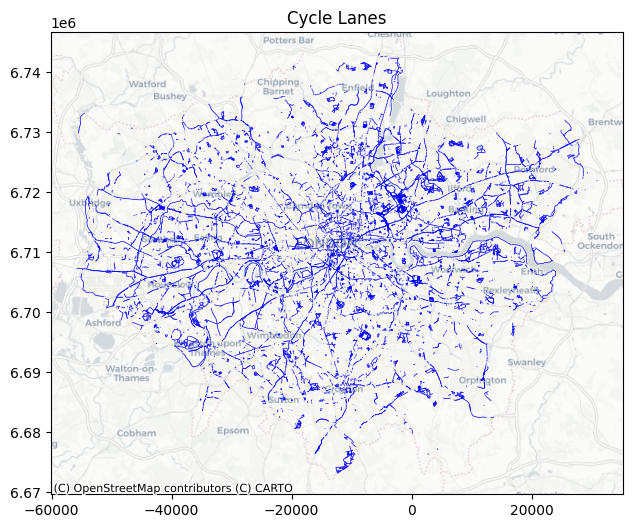

In [231]:
features = cycle_lane['features']
geometries = [shape(feature['geometry']) for feature in features]
gdf_cycle_lane = gpd.GeoDataFrame(geometry=geometries, crs="EPSG:4326")

# change the CRS to 3857
gdf_cycle_lane = gdf_cycle_lane.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 6))
gdf_cycle_lane.plot(ax=ax, color='blue', linewidth=0.5)

ctx.add_basemap(ax, zoom=10, source=ctx.providers.CartoDB.Positron)
ax.set_title('Cycle Lanes')
plt.show()

In [246]:
msoa_london = msoa_london.to_crs(epsg=27700)
gdf_cycle_lane = gdf_cycle_lane.to_crs(epsg=27700)

# using overlay to cut the line in each polygon
cut_lines = gpd.overlay(gdf_cycle_lane, msoa_london, how='intersection')

# calculate the length of the line in each msoa polygon
cut_lines['length'] = cut_lines.geometry.length/1000.0
lengths_by_msoa = cut_lines.groupby('MSOA11CD')['length'].sum().reset_index()

print(lengths_by_msoa.sort_values(by='length', ascending=False))

      MSOA11CD     length
689  E02000726  49.317133
734  E02000777  34.253956
820  E02000866  26.091602
494  E02000524  24.658805
0    E02000001  20.738740
..         ...        ...
451  E02000477   0.019754
691  E02000729   0.017087
31   E02000034   0.016693
23   E02000025   0.010664
940  E02006787   0.002778

[967 rows x 2 columns]


In [239]:
msoa_london = msoa_london.to_crs(epsg=27700)
msoa_london['area_km2'] = msoa_london.geometry.area / 1000000
msoa_london_area = msoa_london[['MSOA11CD', 'area_km2']]

msoa_london_area.sort_values(by='area_km2', ascending=False)

,MSOA11CD,area_km2
958,E02006789,22.448181
504,E02000524,20.508069
272,E02000280,15.561696
477,E02000496,15.221679
28,E02000030,14.577405
...,...,...
842,E02000874,0.344286
853,E02000885,0.334913
837,E02000869,0.319463
183,E02000189,0.294951


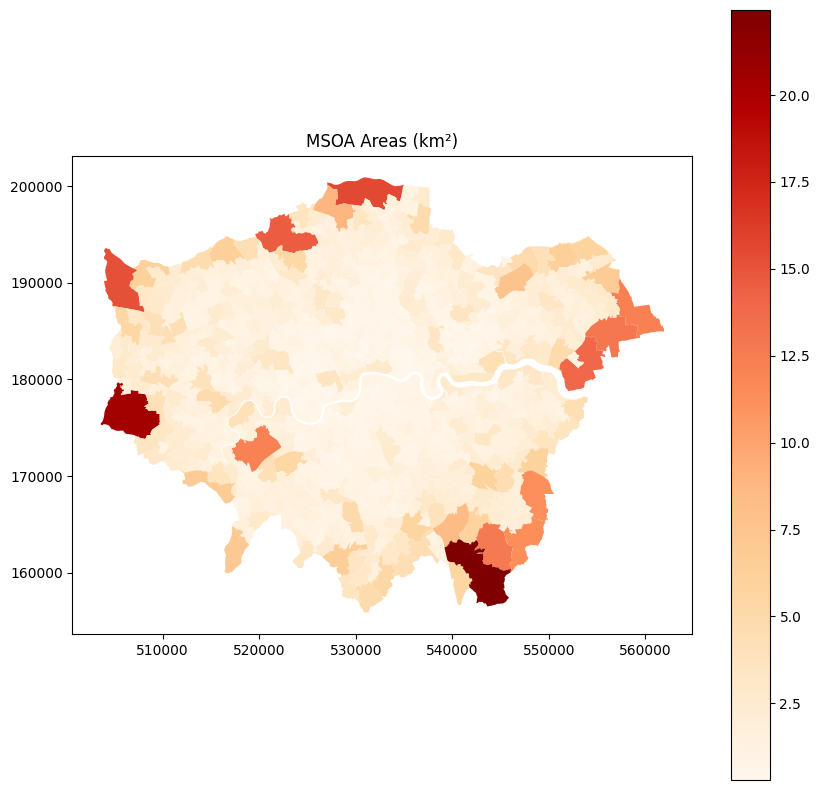

In [240]:
import matplotlib.pyplot as plt

# 繪製多邊形以進行可視化檢查
msoa_london.plot(column='area_km2', legend=True, cmap='OrRd', figsize=(10, 10))
plt.title('MSOA Areas (km²)')
plt.show()

In [228]:
msoa_london.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   MSOA11CD   983 non-null    object  
 1   MSOA11NM   983 non-null    object  
 2   LAD11CD    983 non-null    object  
 3   LAD11NM    983 non-null    object  
 4   RGN11CD    983 non-null    object  
 5   RGN11NM    983 non-null    object  
 6   USUALRES   983 non-null    int32   
 7   HHOLDRES   983 non-null    int32   
 8   COMESTRES  983 non-null    int32   
 9   POPDEN     983 non-null    float64 
 10  HHOLDS     983 non-null    int32   
 11  AVHHOLDSZ  983 non-null    float64 
 12  geometry   983 non-null    geometry
 13  area_m2    983 non-null    float64 
dtypes: float64(3), geometry(1), int32(4), object(6)
memory usage: 92.3+ KB


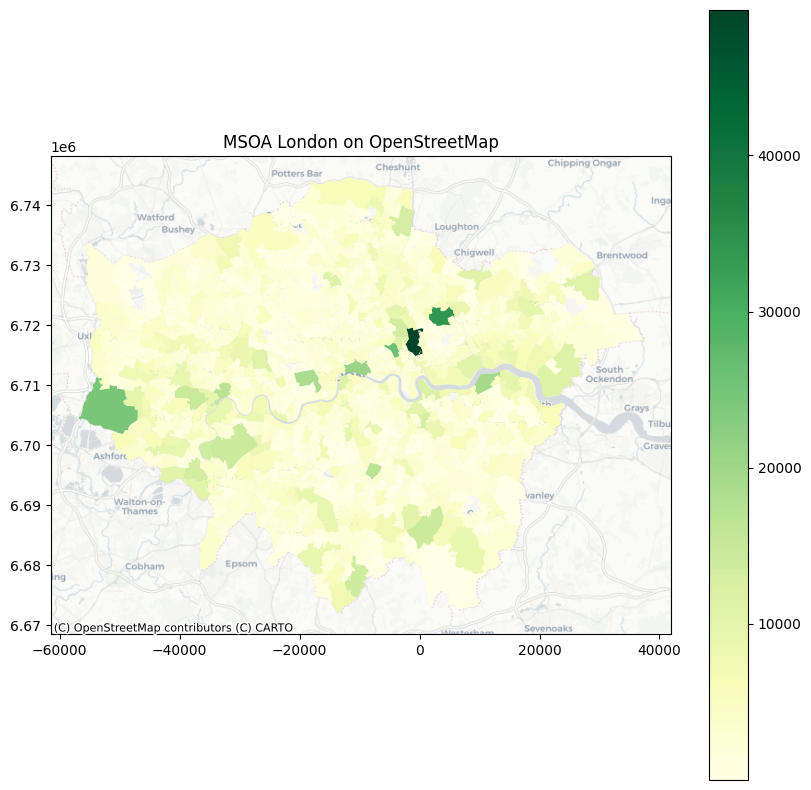

In [243]:
msoa_london_cycle_lane = pd.merge(msoa_london, lengths_by_msoa, on='MSOA11CD', how='left')
msoa_london_cycle_lane = msoa_london_cycle_lane.to_crs(epsg=3857)
fig, ax = plt.subplots(figsize=(10, 10))
msoa_london_cycle_lane.plot(ax=ax, column='length', cmap='YlGn', legend=True)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.title('MSOA London on OpenStreetMap')
plt.show()



### MSOA11CD is the unique ID
### Continuous:  bike lane length, MSOA area, per m2 bike lane length, accident count
### Categorical: road type, weather conditions, age_band_of_driver, sex_of_driver
### time: date, time, day of week